### Abhishek Thakur shared his book on Machine Learning with me and my intention is to go through the code carefully and implement it on my own 

**Approching (Almost) Any Machine Learning Problem**

In [1]:
# import required libraries
import matplotlib.pyplot as plt # for plotting
import numpy as np # handle the numerical arrays
import pandas as pd # create dataframes from the numerical arrays
import seaborn as sns # for plotting
from sklearn import datasets # to get the data and perform t-SNE.
from sklearn import manifold 
%matplotlib inline

In [2]:
# fetched the data using sklearn datasets
data = datasets.fetch_openml(
'mnist_784', version=1, return_X_y=True
)
pixel_values, targets = data
targets = targets.astype(int)

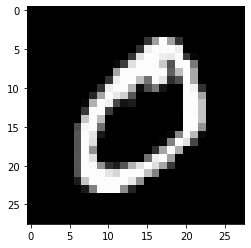

In [3]:
# visualize the samples
single_image = pixel_values[1, :].reshape(28, 28)
plt.imshow(single_image, cmap='gray')

In [4]:
# This step creates the t-SNE transformation of the data
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000, :])

In [5]:
type(tsne)

sklearn.manifold._t_sne.TSNE

In [6]:
# creating a pandas dataframe from a numpy array
tsne_df = pd.DataFrame(
np.column_stack((transformed_data, targets[:3000])),
columns=["x", "y", "targets"] )
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

In [7]:
tsne_df.head()

,x,y,targets
0,-5.281551,-28.952768,5
1,-26.105896,-68.069321,0
2,-42.503582,35.580391,4
3,38.893967,26.663395,1
4,-14.770573,35.433247,9


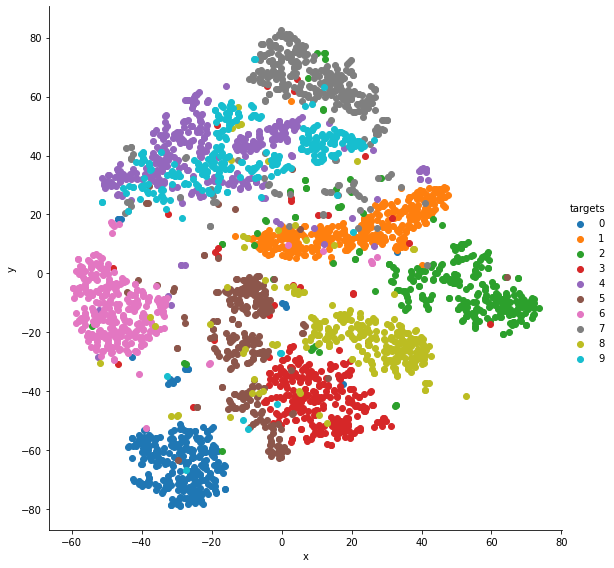

In [8]:
# we can plot it using seaborn and matplotlib
grid = sns.FacetGrid(tsne_df, hue="targets", height=8)
grid.map(plt.scatter, "x", "y").add_legend()

In [9]:
titanic_data = pd.read_csv('titanic_data.csv')

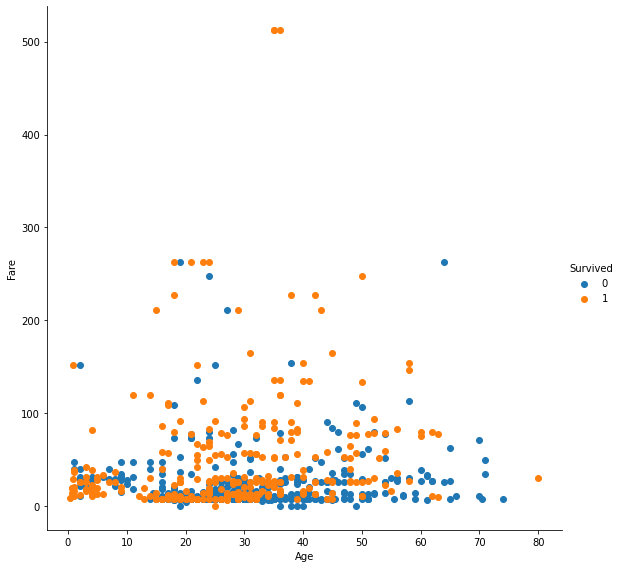

In [10]:
# plotting features from the titanic DataFrame using seaborn and matplotlib
grid = sns.FacetGrid(titanic_data, hue="Survived", height=8)
grid.map(plt.scatter, "Age", "Fare").add_legend()

**Cross-validation**

*cross-validation is a step in the process of building a machine learning model which helps us ensure that our models fit the data accurately and also ensures that we do not overfit*

In [11]:
df = pd.read_csv("winequality-red.csv",sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
df.shape

(1599, 12)

In [13]:
# a mapping dictionary that maps the quality values from 0 to 5
quality_mapping = { 3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}
# you can use the map function of pandas with
# any dictionary to convert the values in a given
# column to values in the dictionary
df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [14]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [15]:
# Splitting can be done easily by the following chunk of code
# use sample with frac=1 to shuffle the dataframe
# we reset the indices since they change after
# shuffling the dataframe
df = df.sample(frac=1).reset_index(drop=True)
# top 1000 rows are selected # for training
df_train = df.head(1000)
# bottom 599 values are selected
# for testing/validation
df_test = df.tail(599)

**We will now train a decision tree model on the training set. For the decision tree model**

In [16]:
# import from scikit-learn
from sklearn import tree
from sklearn import metrics
# initialize decision tree classifier class
# with a max_depth of 3
clf = tree.DecisionTreeClassifier(max_depth=7)
# choose the columns you want to train on # these are the features for the model
cols = ['fixed acidity',
        'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
        'free sulfur dioxide', 'total sulfur dioxide', 'density',
        'pH', 'sulphates', 'alcohol']
# train the model on the provided features
# and mapped quality from before
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
# we test the accuracy of this model on the training set and the test set
# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])
# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])
# calculate the accuracy of predictions on # training data set
train_accuracy = metrics.accuracy_score(
df_train.quality, train_predictions )
# calculate the accuracy of predictions on
# test data set
test_accuracy = metrics.accuracy_score(
df_test.quality, test_predictions )

In [18]:
# train & test accuracy with max_depth of 3
print(train_accuracy)

0.762


In [19]:
print(test_accuracy)

0.5959933222036727


In [20]:
# train & test accuracy with max_depth of 7
print(train_accuracy)
print(test_accuracy)

0.762
0.5959933222036727


In [21]:
# import scikit-learn tree and metrics
from sklearn import tree 
from sklearn import metrics
# import matplotlib and seaborn # for plotting
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

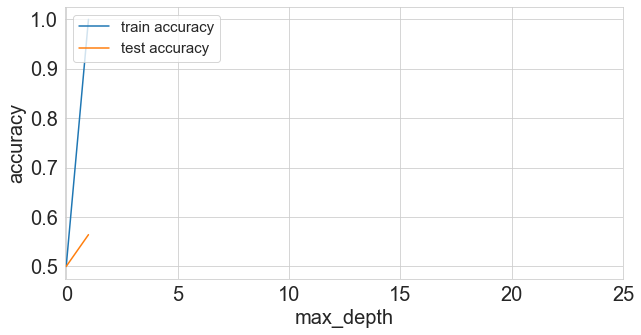

In [22]:
# this is our global size of label text # on the plots
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
# This line ensures that the plot is displayed # inside the notebook
%matplotlib inline
# initialize lists to store accuracies # for training and test data
# we start with 50% accuracy 
train_accuracies = [0.5] 
test_accuracies = [0.5]
# iterate over a few depth values
for depth in range(1, 25):
    # init the model
    clf = tree.DecisionTreeClassifier(max_depth=depth)
# columns/features for training
# note that, this can be done outside # the loop
cols = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
    'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH',
    'sulphates', 'alcohol'
]
# fit the model on given features
clf.fit(df_train[cols], df_train.quality)
# create training & test predictions
train_predictions = clf.predict(df_train[cols]) 
test_predictions = clf.predict(df_test[cols])
# calculate training & test accuracies
train_accuracy = metrics.accuracy_score( df_train.quality, train_predictions
)
test_accuracy = metrics.accuracy_score(
df_test.quality, test_predictions )
# append accuracies
train_accuracies.append(train_accuracy) 
test_accuracies.append(test_accuracy)

# create two plots using matplotlib
# and seaborn
plt.figure(figsize=(10, 5)) 
sns.set_style("whitegrid") 
plt.plot(train_accuracies, label="train accuracy") 
plt.plot(test_accuracies, label="test accuracy") 
plt.legend(loc="upper left", prop={'size': 15}) 
plt.xticks(range(0, 26, 5)) 
plt.xlabel("max_depth", size=20) 
plt.ylabel("accuracy", size=20)
plt.show()

**Occam’s razor**

*Occam's razor states that one should not try to complicate things that can be solved in a much simpler manner. In other words, the simplest solutions are the most generalizable solutions.*

**Cross-validation techniques**

k-fold cross-validation

stratified k-fold cross-validation

hold-out based validation

leave-one-out cross-validation

group k-fold cross-validation

In [23]:
# We can split any data into k-equal parts using KFold from scikit-learn
# import pandas and model_selection module of scikit-learn
import pandas as pd
from sklearn import model_selection
if __name__ == "__main__":
# Training data is in a CSV file called train.csv 
    df = pd.read_csv("train.csv")
# we create a new column called kfold and fill it with -1
    df["kfold"] = -1
    # the next step is to randomize the rows of the data
    df = df.sample(frac=1).reset_index(drop=True)
    # initiate the kfold class from model_selection module
    kf = model_selection.KFold(n_splits=5)
    # fill the new kfold column
    for fold, (trn_, val_) in enumerate(kf.split(X=df)): 
        df.loc[val_, 'kfold'] = fold
# save the new csv with kfold column
df.to_csv("train_folds.csv", index=False)

In [33]:
df_fold = ('train_folds.csv')
df_fold = pd.read_csv(df_fold)
df_fold.head()

,PassengerId,target,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,kfold
0,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S,0
1,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S,0
2,140,0,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.2000,B86,C,0
3,95,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,NaN,S,0
4,530,0,2,"Hocking, Mr. Richard George",male,23.0,2,1,29104,11.5000,NaN,S,0


In [24]:
# The next important type of cross-validation is stratified k-fold
# Stratified k-fold cross-validation keeps the ratio of labels in each fold constant
# import pandas and model_selection module of scikit-learn
import pandas as pd
from sklearn import model_selection
if __name__ == "__main__":
# Training data is in a csv file called train.csv 
    df = pd.read_csv("train_1.csv")
# we create a new column called kfold and fill it with -1
    df["kfold"] = -1
    # the next step is to randomize the rows of the data
    df = df.sample(frac=1).reset_index(drop=True) # fetch targets
    y = df.target.values
    # initiate the kfold class from model_selection module
    kf = model_selection.StratifiedKFold(n_splits=5)
# fill the new kfold column
    for f, (t_, v_) in enumerate(kf.split(X=df, y=y)): 
        df.loc[v_, 'kfold'] = f
# save the new csv with kfold column
df.to_csv("train_folds.csv", index=False)

In [34]:
df_fold = ('train_folds.csv')
df_fold = pd.read_csv(df_fold)
df_fold.head()

,PassengerId,target,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,kfold
0,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S,0
1,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S,0
2,140,0,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.2000,B86,C,0
3,95,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,NaN,S,0
4,530,0,2,"Hocking, Mr. Richard George",male,23.0,2,1,29104,11.5000,NaN,S,0


In [35]:
df_fold.columns

Index(['PassengerId', 'target', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'kfold'],
      dtype='object')

Text(0, 0.5, 'count')

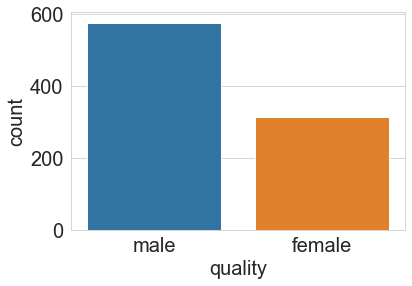

In [39]:
# Can I check the distribution of the titanic dataset?
b = sns.countplot(x='Sex', data=df_fold)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

In [25]:
df = pd.read_csv("winequality-red.csv",sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [26]:
# a mapping dictionary that maps the quality values from 0 to 5
quality_mapping = { 3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}
# you can use the map function of pandas with
# any dictionary to convert the values in a given
# column to values in the dictionary
df.loc[:, "quality"] = df.quality.map(quality_mapping)

Text(0, 0.5, 'count')

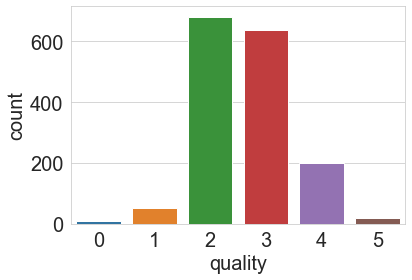

In [27]:
# For the wine dataset, let’s look at the distribution of labels.
b = sns.countplot(x='quality', data=df)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

In [28]:
# The rule is simple. If it’s a standard classification problem, choose stratified k-fold blindly.

*Suppose we have 1 million samples. A 5 fold cross-validation would mean training on 800k samples and validating on 200k. Depending on which algorithm we choose, training and even validation can be very expensive for a dataset which is of this size. In these cases, we can opt for a hold-out based validation*

In [29]:
# The process for creating the hold-out remains the same as stratified k-fold.
# Hold-out is also used very frequently with time-series data

In [30]:
# To use stratified k-fold for a regression problem
# we have first to divide the target into bins, 
#and then we can use stratified k-fold in the same way
#as for classification problems

In [31]:
# Let’s make a sample regression dataset and try to apply stratified k-fold 
#as shown in the following python snippet.
# stratified-kfold for regression
import numpy as np 
import pandas as pd
from sklearn import datasets
from sklearn import model_selection

In [32]:
def create_folds(data):
# we create a new column called kfold and fill it with -1 
    data["kfold"] = -1

# the next step is to randomize the rows of the data
    data = data.sample(frac=1).reset_index(drop=True)

# calculate the number of bins by Sturge's rule 
# I take the floor of the value, you can also
# just round it
    num_bins = int(np.floor(1 + np.log2(len(data))))

# bin targets
    data.loc[:, "bins"] = pd.cut(
    data["target"], bins=num_bins, labels=False)

# initiate the kfold class from model_selection module
    kf = model_selection.StratifiedKFold(n_splits=5)

# fill the new kfold column
# note that, instead of targets, we use bins!
    for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
        data.loc[v_, 'kfold'] = f

# drop the bins column
    data = data.drop("bins", axis=1) 

# return dataframe with folds 
    return data

if __name__ == "__main__":
# we create a sample dataset with 15000 samples 
# and 100 features and 1 target
    X, y = datasets.make_regression(
    n_samples=15000, n_features=100, n_targets=1 )

# create a dataframe out of our numpy arrays
df = pd.DataFrame(X, columns=[f"f_{i}" for i in range(X.shape[1])])
df.loc[:, "target"] = y

# create folds
df = create_folds(df)

/Users/peterokwukogu/anaconda3/envs/data_sci/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [44]:
df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,target,kfold
0,-1.228536,-0.733262,-0.670580,-1.103922,-0.285420,-1.521755,2.144758,-0.410102,-0.400578,0.660672,...,-0.263367,1.262259,1.522137,-2.003262,0.452481,-1.049289,-2.461066,0.579943,182.753061,0
1,-0.198496,-0.520605,1.860107,-0.370592,0.630195,0.608889,1.838838,-0.933676,0.378478,-1.017351,...,1.670407,0.649134,0.071674,-0.893101,-0.541964,-0.618023,0.876591,0.979853,-293.179632,0
2,-0.247206,-0.294075,1.401463,1.079909,-0.321609,-0.795261,-1.190069,2.940722,-0.286146,-0.357268,...,-0.352805,-0.010015,0.784413,-0.089871,1.070402,-0.105504,-0.298019,0.901630,290.434031,0
3,1.501583,0.996538,-0.613763,-2.190950,1.764042,-0.656939,1.903319,0.108353,-1.065986,0.470203,...,-0.793368,-0.093133,-2.675635,0.787381,0.604193,-1.364387,-0.743293,-1.343212,-329.580140,0
4,0.513664,0.829374,0.298694,-0.570106,-0.579334,-0.127086,1.164414,-0.179051,-0.877583,0.606394,...,1.514915,-1.058507,-0.982054,-1.128056,1.149283,-1.410839,-0.116847,0.492386,-46.852663,0


In [45]:
df.shape

(15000, 102)

*Cross-validation is the first and most essential step when it comes to building machine learning models. If you want to do feature engineering, split your data first. If you're going to build models, split your data first. If you have a good cross- validation scheme in which validation data is representative of training and real- world data, you will be able to build a good machine learning model which is highly generalizable.*


*The types of cross-validation presented in this chapter can be applied to almost any machine learning problem. Still, you must keep in mind that cross-validation also depends a lot on the data and you might need to adopt new forms of cross-validation depending on your problem and data.*


*For example, let’s say we have a problem in which we would like to build a model to detect skin cancer from skin images of patients. Our task is to build a binary classifier which takes an input image and predicts the probability for it being benign or malignant.*


*In these kinds of datasets, you might have multiple images for the same patient in the training dataset. So, to build a good cross-validation system here, you must have stratified k-folds, but you must also make sure that patients in training data do not appear in validation data.* 

*Fortunately, scikit-learn offers a type of cross-validation known as GroupKFold. Here the patients can be considered as groups. But unfortunately, there is no way to combine GroupKFold with StratifiedKFold in scikit-learn.*

**Evaluation metrics**